In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelBinarizer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/kaggle/input/dataset-for-predicting-watering-the-plants/TARP.csv')
df.head()

Soil Moisture  Temperature   Soil Humidity  Time  Air temperature (C)  \
0             54           22              70    21                19.52   
1             12           20              40   104                19.49   
2             34           26              35    62                19.47   
3              7           44              44    93                19.54   
4             50           38              23    92                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

         ph    rainfall     N     P     K Status  
0  6.502985  202.935536  90.0  42.0  43.0     ON  
1  7.038096  226.655537  85.0  58.0  41.0    OFF  
2  7.840207  263.964248  60.0  55.0  44.0     ON  
3  6.980401  242.864034  74.0  35.0  40.0    OFF  
4  7.628473  262.717340  78.0  42.0  42.0    OFF

In [3]:
encoder = LabelBinarizer()
df['Status'] = encoder.fit_transform(df['Status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  int64  
dtypes: float64(10), in

In [4]:
df.describe().T

count        mean        std         min         25%  \
Soil Moisture        100000.0   45.484070  25.993998    1.000000   23.000000   
Temperature          100000.0   22.536100  13.251352    0.000000   11.000000   
 Soil Humidity       100000.0   45.016790  14.726676   20.000000   32.000000   
Time                 100000.0   55.253650  32.093033    0.000000   28.000000   
Air temperature (C)   23995.0   24.263780   6.756751   11.220000   18.580000   
Wind speed (Km/h)     23995.0    9.896898   4.325666    0.000000    6.830000   
Air humidity (%)      23995.0   58.521052  30.073448    0.590000   33.980000   
Wind gust (Km/h)      23995.0   41.744905  24.168987    0.000000   21.820000   
Pressure (KPa)        23995.0  101.131418   0.218448  100.500000  100.980000   
ph                     2200.0    6.469480   0.773938    3.504752    5.971693   
rainfall               2200.0  103.463655  54.958389   20.211267   64.551686   
N                      2200.0   50.551818  36.917334    0.000000   21.000000   
P                      2200.0   53.362727  32.985883    5.000000   28.000000   
K                      2200.0   48.149091  50.647931    5.000000   20.000000   
Status               100000.0    0.536500   0.498668    0.000000    0.000000   

                            50%         75%         max  
Soil Moisture         45.000000   68.000000   90.000000  
Temperature           23.000000   34.000000   45.000000  
 Soil Humidity        45.000000   58.000000   70.000000  
Time                  55.000000   83.000000  110.000000  
Air temperature (C)   22.150000   29.590000   45.560000  
Wind speed (Km/h)      9.530000   12.460000   31.360000  
Air humidity (%)      61.310000   86.360000   96.000000  
Wind gust (Km/h)      37.240000   59.275000  133.330000  
Pressure (KPa)       101.120000  101.260000  101.860000  
ph                     6.425045    6.923643    9.935091  
rainfall              94.867624  124.267508  298.560117  
N                     37.000000   84.250000  140.000000  
P                     51.000000   68.000000  145.000000  
K                     32.000000   49.000000  205.000000  
Status                 1.000000    1.000000    1.000000

In [5]:
imputer = IterativeImputer(random_state=46, verbose=True)
data = imputer.fit_transform(df)
data = pd.DataFrame(data, columns = df.columns)
data.head()

[IterativeImputer] Completing matrix with shape (100000, 15)
[IterativeImputer] Change: 290.80942331563523, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 92.93743015114642, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 36.41378245598699, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 22.288778775592537, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 14.186852778425072, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 9.057472360285807, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 5.783789901159407, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 3.693330176326376, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 2.35843202560938, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 1.5060124036972873, scaled tolerance: 0.2985601175 


Soil Moisture  Temperature   Soil Humidity   Time  Air temperature (C)  \
0           54.0         22.0            70.0   21.0                19.52   
1           12.0         20.0            40.0  104.0                19.49   
2           34.0         26.0            35.0   62.0                19.47   
3            7.0         44.0            44.0   93.0                19.54   
4           50.0         38.0            23.0   92.0                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

         ph    rainfall     N     P     K  Status  
0  6.502985  202.935536  90.0  42.0  43.0     1.0  
1  7.038096  226.655537  85.0  58.0  41.0     0.0  
2  7.840207  263.964248  60.0  55.0  44.0     1.0  
3  6.980401  242.864034  74.0  35.0  40.0     0.0  
4  7.628473  262.717340  78.0  42.0  42.0     0.0

<Axes: >

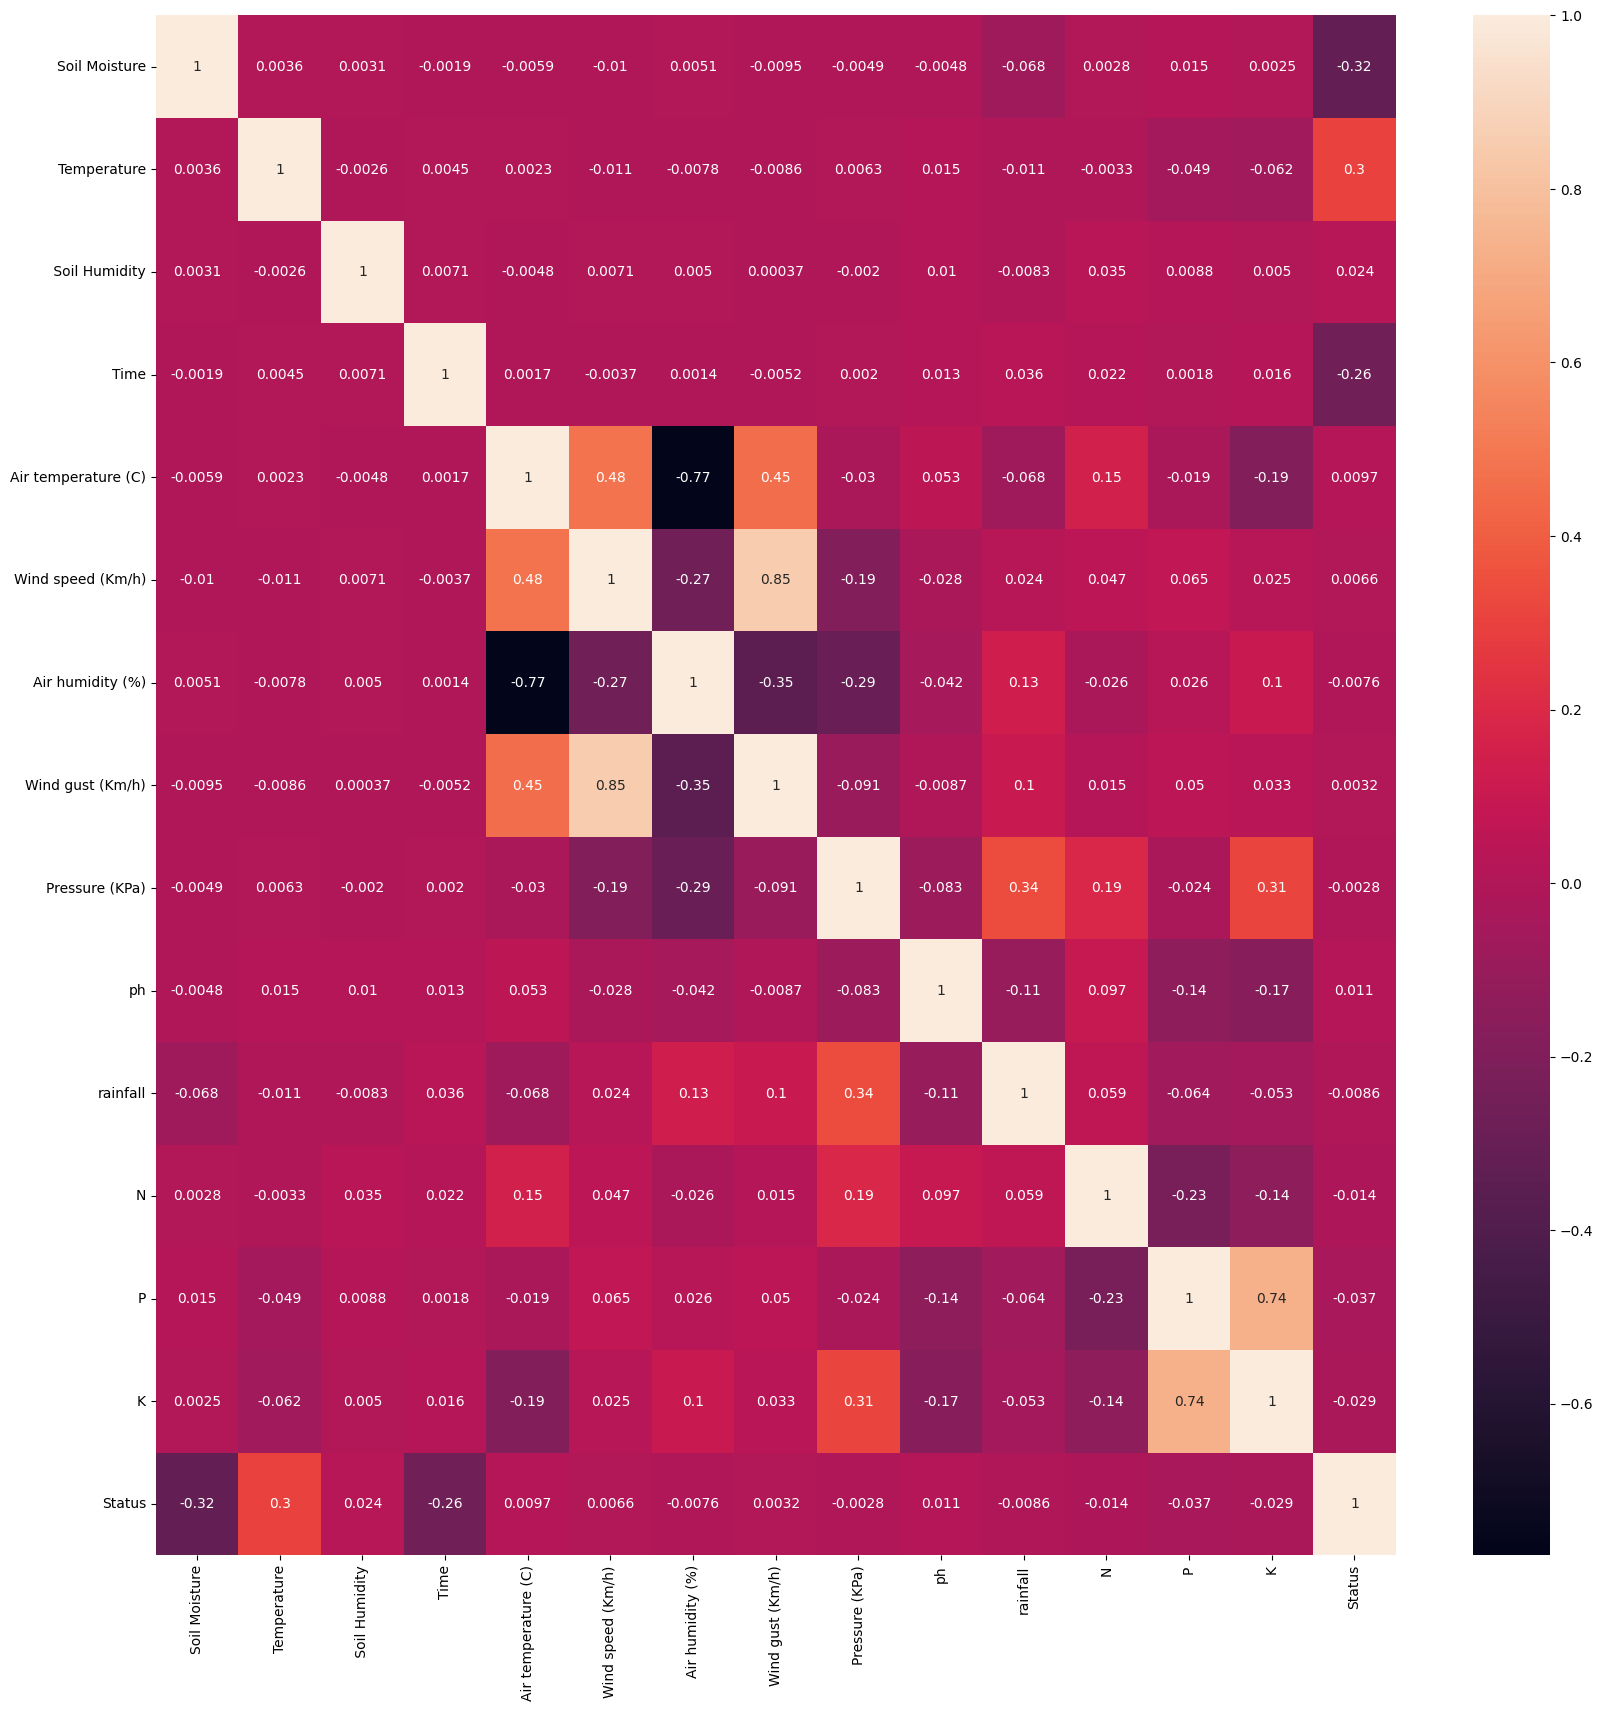

In [6]:
import seaborn as sns
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [7]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
sdf = scaler.fit_transform(data.iloc[:,:-1], data.iloc[:,-1])
scaled_df = pd.DataFrame(sdf, columns = data.iloc[:,:-1].columns)
scaled_df['Status'] = data['Status']
scaled_df.head()

Soil Moisture  Temperature   Soil Humidity      Time  Air temperature (C)  \
0       0.191011    -0.022222            1.00 -0.618182            -0.516599   
1      -0.752809    -0.111111           -0.20  0.890909            -0.518346   
2      -0.258427     0.155556           -0.40  0.127273            -0.519511   
3      -0.865169     0.955556           -0.04  0.690909            -0.515434   
4       0.101124     0.688889           -0.88  0.672727            -0.511357   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0          -0.864158          0.141390         -0.905498        0.470588   
1          -0.871811          0.144115         -0.843096        0.470588   
2          -0.878827          0.146840         -0.780545        0.485294   
3          -0.854592          0.123782         -0.758794        0.485294   
4          -0.830357          0.100514         -0.737193        0.485294   

         ph  rainfall         N         P         K  Status  
0 -0.067473  0.312916  0.285714 -0.471429 -0.247192     1.0  
1  0.098961  0.483349  0.214286 -0.242857 -0.262589     0.0  
2  0.348438  0.751421 -0.142857 -0.285714 -0.239493     1.0  
3  0.081016  0.599811  0.057143 -0.571429 -0.270288     0.0  
4  0.282583  0.742461  0.114286 -0.471429 -0.254891     0.0

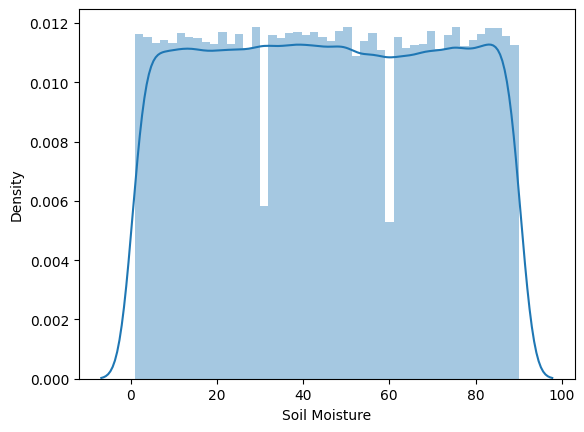

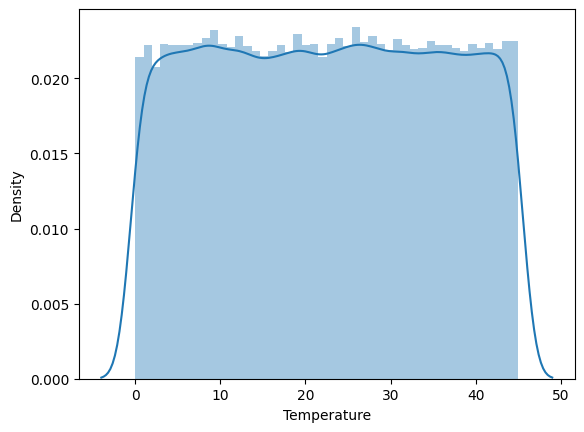

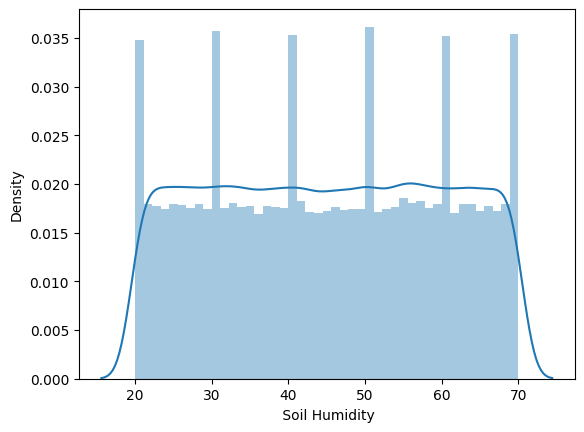

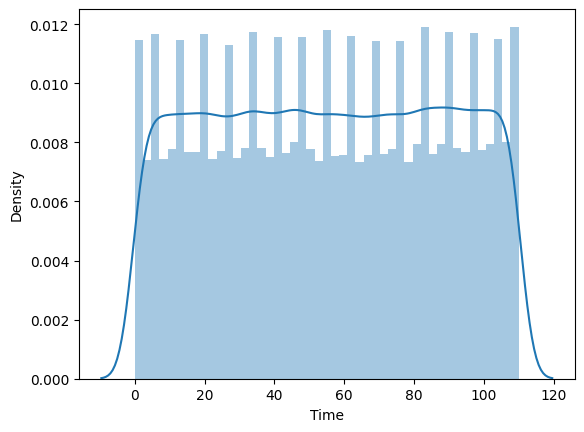

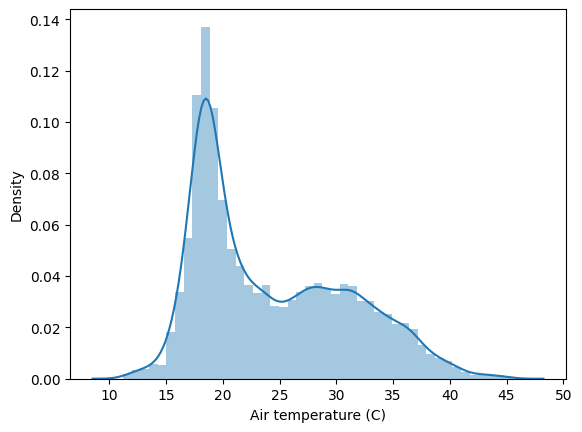

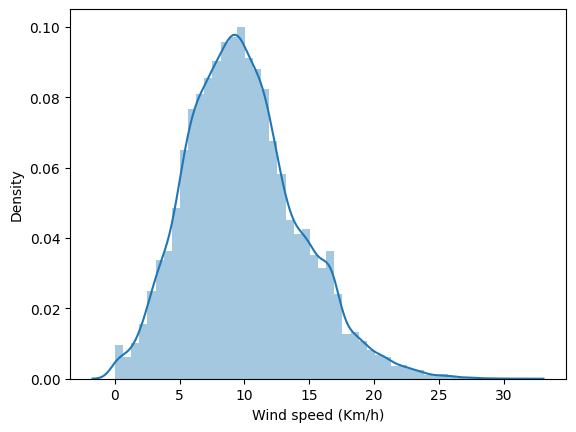

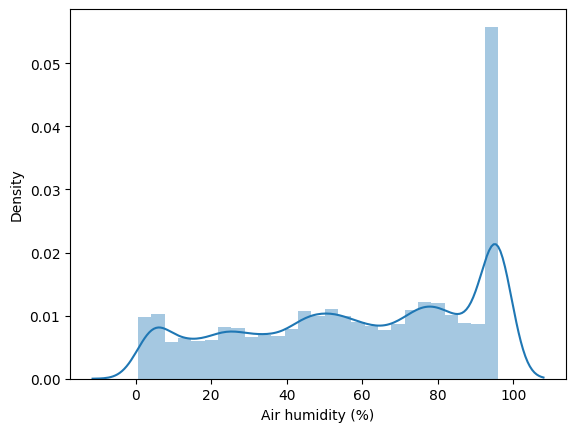

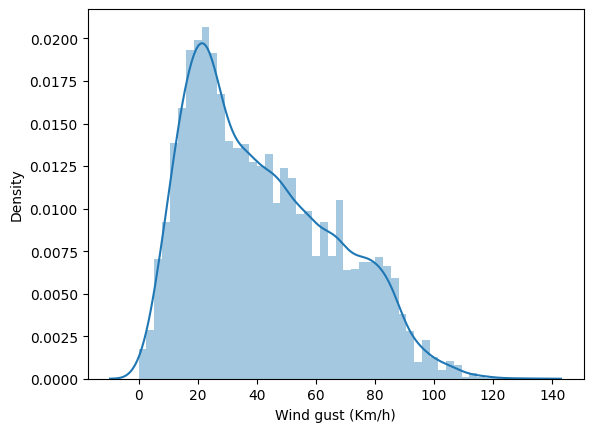

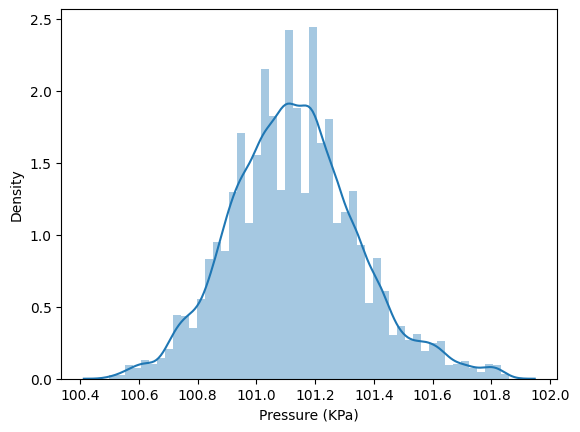

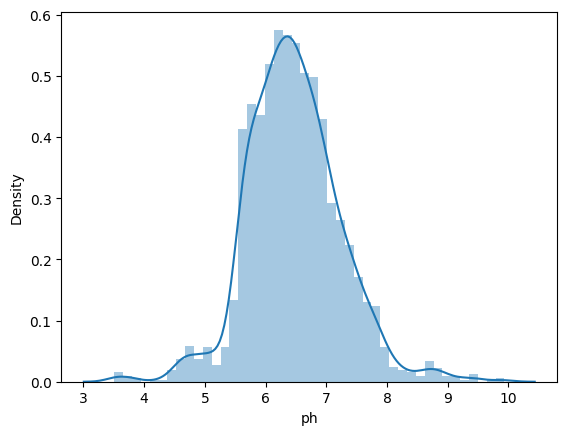

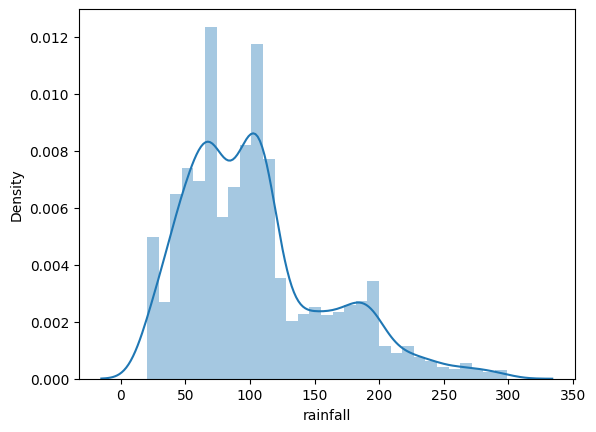

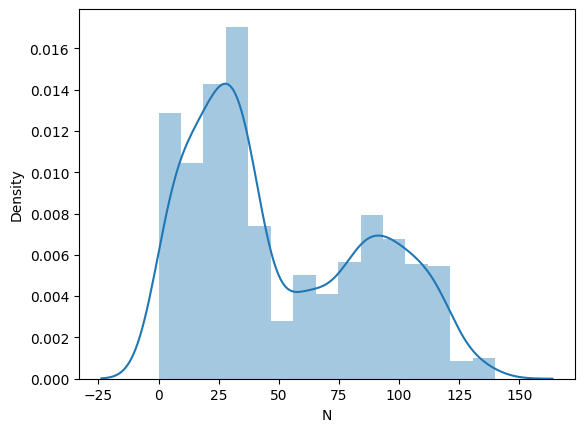

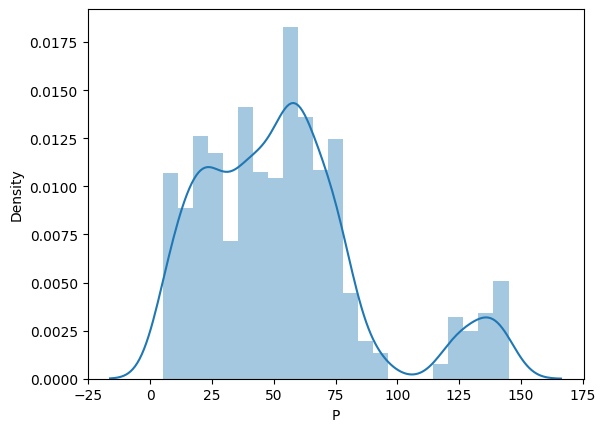

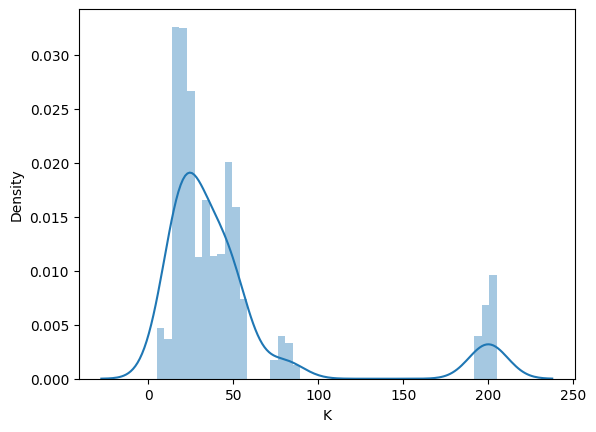

In [8]:
def distplots(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df.columns)[:-1]:
  distplots(i)

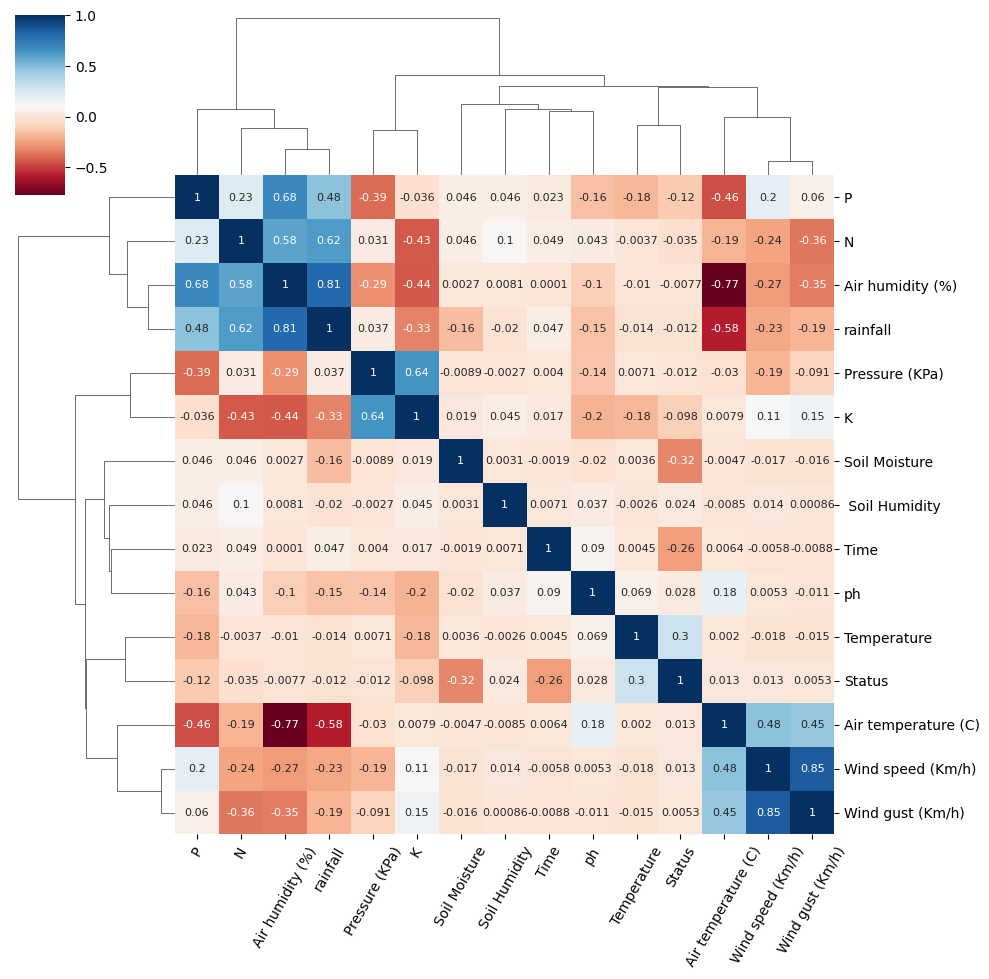

In [9]:
g = sns.clustermap(scaled_df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

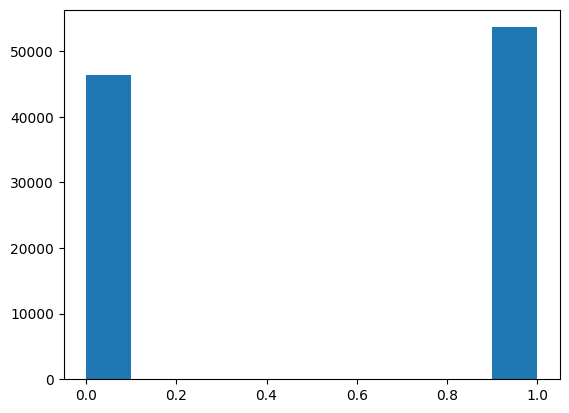

In [10]:
plt.hist(scaled_df['Status'])
plt.show()

*SVM*

In [11]:
x = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]

In [12]:
#scaling the data
scaler = MinMaxScaler((-1,1))
#scaler = StandardScaler()
x=scaler.fit_transform(x)
y = y

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=7)

In [14]:
# Apply KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn = model_knn3.fit(x_train, y_train)
# Predicting Test Set N=3
y_pred = model_knn3.predict(x_test)
#Accuracy
accuracy_KNN = accuracy_score (y_test, y_pred)
print(f'Accuracy: {accuracy_KNN * 100:.2f}%')

Accuracy: 92.44%


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     13958
         1.0       0.93      0.93      0.93     16042

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000



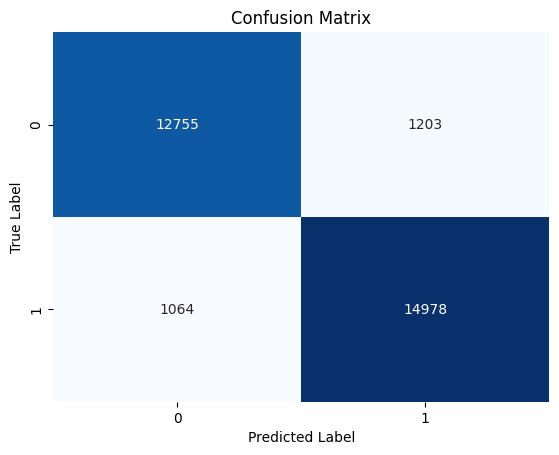

In [16]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
input_data = (5,23,27,4,21.44,5.8,28.38,22.67,101.46,7.375482851,224.0581164,98,47,37)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)

prediction = model_knn3.predict(std_data)
print(prediction)

[1.]
